In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv
import sys
from  PIL  import Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


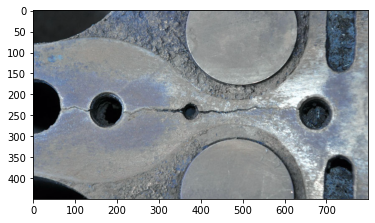

In [ ]:
img = cv2.imread('/content/drive/MyDrive/cracked-engine-block.jpg')
plt.imshow(img)

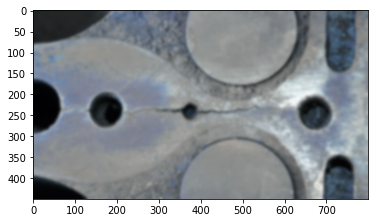

In [ ]:
original = img.copy()
edges = cv.GaussianBlur(img, (21, 51), 3)
plt.imshow(edges)

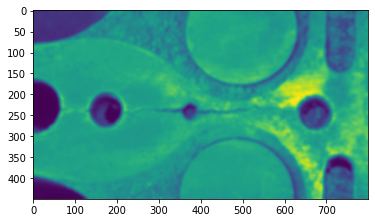

In [ ]:
edges = cv.cvtColor(edges, cv.COLOR_BGR2GRAY)
plt.imshow(edges)

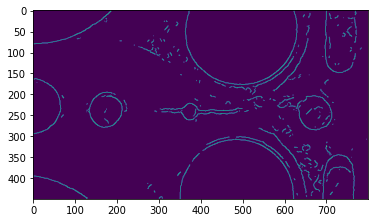

In [ ]:
edges = cv.Canny(edges, 50, 50)
plt.imshow(edges)

In [ ]:
_, thresh = cv.threshold(edges, 0, 255, cv.THRESH_BINARY  + cv.THRESH_OTSU)
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (5, 5))
mask = cv.morphologyEx(thresh, cv.MORPH_CLOSE, kernel, iterations=4)

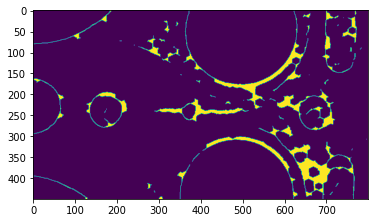

In [ ]:
plt.imshow(mask)

In [ ]:
data = mask.tolist()
sys.setrecursionlimit(10**8)
for i in  range(len(data)):
    for j in  range(len(data[i])):
        if data[i][j] !=  255:
            data[i][j] =  -1
        else:
            break
    for j in  range(len(data[i])-1, -1, -1):
        if data[i][j] !=  255:
            data[i][j] =  -1
        else:
            break
image = np.array(data)
image[image !=  -1] =  255
image[image ==  -1] =  0

mask = np.array(image, np.uint8)

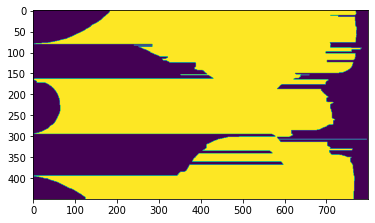

In [ ]:
plt.imshow(mask)

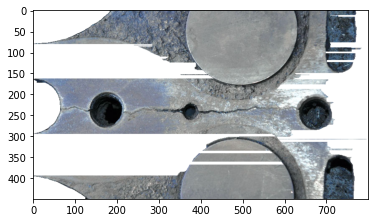

In [ ]:
result = cv.bitwise_and(original, original, mask=mask)
result[mask ==  0] =  255
cv.imwrite('bg.png', result)
plt.imshow(result)

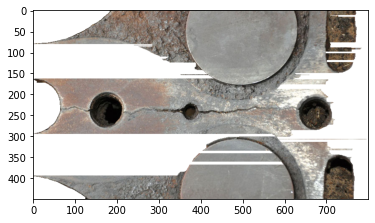

In [ ]:
img = Image.open('bg.png')
img.convert("RGBA")
datas = img.getdata()

newData = []
for item in datas:
    if item[0] ==  255  and item[1] ==  255  and item[2] ==  255:
        newData.append((255, 255, 255, 0))
    else:
        newData.append(item)

img.putdata(newData)
img.save("img.png", "PNG")
plt.imshow(img)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv

img = cv2.imread('/content/drive/MyDrive/cracked-engine-block.jpg')

original = img.copy()

edges = cv.GaussianBlur(img, (21, 51), 3)
edges = cv.cvtColor(edges, cv.COLOR_BGR2GRAY)
edges = cv.Canny(edges, int(max(5,6)), int(min(6,6)))

_, thresh = cv.threshold(edges, 0, 255, cv.THRESH_BINARY  + cv.THRESH_OTSU)
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (5, 5))
mask = cv.morphologyEx(thresh, cv.MORPH_CLOSE, kernel, iterations=4)

data = mask.tolist()
sys.setrecursionlimit(10**8)
for i in  range(len(data)):
    for j in  range(len(data[i])):
        if data[i][j] !=  255:
            data[i][j] =  -1
        else:
            break
    for j in  range(len(data[i])-1, -1, -1):
        if data[i][j] !=  255:
            data[i][j] =  -1
        else:
            break
image = np.array(data)
image[image !=  -1] =  255
image[image ==  -1] =  0

mask = np.array(image, np.uint8)

result = cv.bitwise_and(original, original, mask=mask)
result[mask ==  0] =  255
cv.imwrite('bg.png', result)

img = Image.open('bg.png')
img.convert("RGBA")
datas = img.getdata()

newData = []
for item in datas:
    if item[0] ==  255  and item[1] ==  255  and item[2] ==  255:
        newData.append((255, 255, 255, 0))
    else:
        newData.append(item)

img.putdata(newData)
img.save("img.png", "PNG")

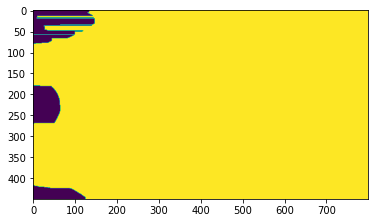

In [ ]:
plt.imshow(mask)

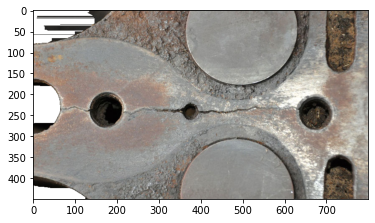

In [ ]:
plt.imshow(img)

In [ ]:
from matplotlib import pyplot as plt

img = cv2.imread('/content/drive/MyDrive/cracked-engine-block.jpg')

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

In [ ]:
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

In [ ]:
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0

In [ ]:
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

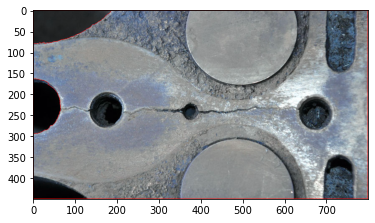

In [ ]:
plt.imshow(img)

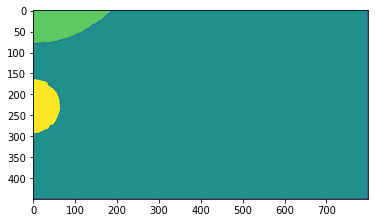

In [ ]:
plt.imshow(markers)

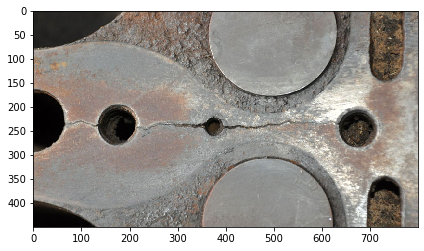

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import skimage.color
import skimage.filters
import skimage.io

# read and display the original image
image = skimage.io.imread(fname='/content/drive/MyDrive/cracked-engine-block.jpg')
skimage.io.imshow(image)

In [ ]:
# blur and grayscale before thresholding
blur = skimage.color.rgb2gray(image)
blur = skimage.filters.gaussian(blur, sigma=2)

In [ ]:
t = skimage.filters.threshold_otsu(blur)
mask = blur > t

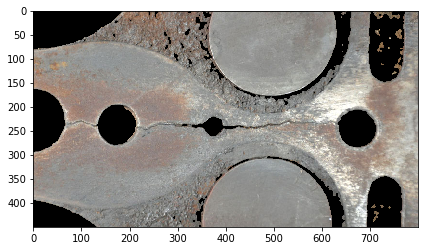

In [ ]:
sel = np.zeros_like(image)
sel[mask] = image[mask]

# display the result
skimage.io.imshow(sel)

In [ ]:
print(t)

0.38356763866163596


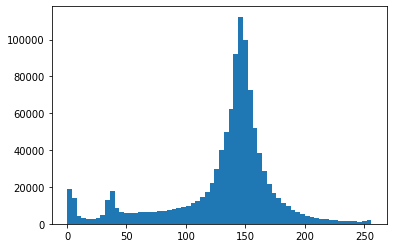

In [ ]:
n,bin,patches = plt.hist(image.ravel(), bins=64, range=[0, 256])

In [ ]:
n

array([ 19060.,  14257.,   4152.,   3091.,   2426.,   2551.,   2890.,
         5020.,  12852.,  17969.,   8455.,   6172.,   5955.,   6004.,
         6063.,   6238.,   6350.,   6303.,   6463.,   6727.,   7060.,
         7536.,   8234.,   8813.,   9347.,   9779.,  11103.,  12593.,
        14449.,  17202.,  22417.,  30015.,  40004.,  49700.,  62532.,
        92113., 112411.,  99608.,  72834.,  52168.,  38677.,  28653.,
        21586.,  16776.,  14005.,  11400.,   9465.,   7735.,   6280.,
         5356.,   4303.,   3772.,   3137.,   2723.,   2361.,   2214.,
         1988.,   1781.,   1563.,   1487.,   1322.,   1226.,   1295.,
         1979.])

In [ ]:
bin

array([  0.,   4.,   8.,  12.,  16.,  20.,  24.,  28.,  32.,  36.,  40.,
        44.,  48.,  52.,  56.,  60.,  64.,  68.,  72.,  76.,  80.,  84.,
        88.,  92.,  96., 100., 104., 108., 112., 116., 120., 124., 128.,
       132., 136., 140., 144., 148., 152., 156., 160., 164., 168., 172.,
       176., 180., 184., 188., 192., 196., 200., 204., 208., 212., 216.,
       220., 224., 228., 232., 236., 240., 244., 248., 252., 256.])

In [ ]:
img = cv2.imread('/content/drive/MyDrive/cracked-engine-block.jpg')
ret,thresh1 = cv2.threshold(img,100,250,cv2.THRESH_BINARY)

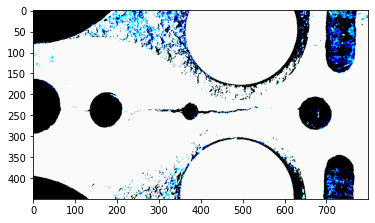

In [ ]:
plt.imshow(thresh1)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install pixellib

     |████████████████████████████████| 69 kB 5.0 MB/s 
  Created wheel for imantics: filename=imantics-0.1.12-py3-none-any.whl size=16031 sha256=38c6a946a5afdfd8f677312a87e1b582d9d4b3336c543912f71704b9562296b9
  Stored in directory: /root/.cache/pip/wheels/da/7c/3e/296fe3ed4eb3bd713e91dee0d0549f12f316d49939a64bdc96
Successfully built imantics


In [ ]:
import pixellib
from pixellib.semantic import semantic_segmentation

segment_image = semantic_segmentation()
segment_image.load_ade20k_model("/content/drive/MyDrive/deeplabv3_xception65_ade20k.h5")
segment_image.segmentAsAde20k("/content/drive/MyDrive/cracked-engine-block.jpg", output_image_name = "/content/drive/MyDrive/output.jpg")


Processed Image saved successfuly in your current working directory.


({'class_ids': array([  1,   2,   5,   6,   7,   9,  11,  14,  17,  21,  22,  35,  48,
          59, 123, 146, 148]),
  'masks': array([[ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True],
         ...,
         [ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True, False]])},
 array([[[  3, 200,   4],
         [  3, 200,   4],
         [  3, 200,   4],
         ...,
         [ 70, 120, 120],
         [ 70, 120, 120],
         [ 70, 120, 120]],
 
        [[  3, 200,   4],
         [  3, 200,   4],
         [  3, 200,   4],
         ...,
         [ 70, 120, 120],
         [ 70, 120, 120],
         [ 70, 120, 120]],
 
        [[  3, 200,   4],
         [  3, 200,   4],
         [  3, 200,   4],
         ...,
         [ 70, 120, 120],
         [ 70, 120, 120],
         [ 70, 120

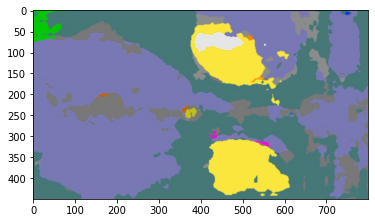

In [ ]:
plt.imshow(cv2.imread('/content/drive/MyDrive/output.jpg'))

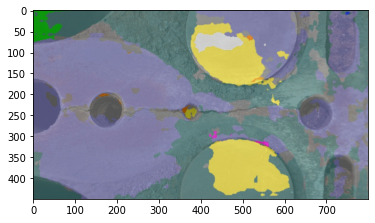

In [ ]:
import matplotlib.pyplot as plt
import cv2
plt.imshow(cv2.imread('/content/drive/MyDrive/output.jpg'))

In [ ]:
import pixellib
from pixellib.semantic import semantic_segmentation

segment_vip24801@vip365.pubimage = semantic_segmentation()
segment_image.load_pascalvoc_model("/content/drive/MyDrive/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5") 
segment_image.segmentAsPascalvoc("/content/drive/MyDrive/cracked-engine-block.jpg", output_image_name = "/content/drive/MyDrive/output1.jpg", overlay=True)

Processed Image saved successfully in your current working directory.


({'class_ids': array([0]), 'masks': False}, array([[[14, 14, 13],
         [12, 12, 11],
         [12, 12, 10],
         ...,
         [39, 38, 35],
         [39, 38, 34],
         [39, 38, 34]],
 
        [[14, 14, 13],
         [12, 12, 11],
         [12, 12, 10],
         ...,
         [41, 40, 37],
         [39, 38, 35],
         [39, 38, 35]],
 
        [[14, 14, 13],
         [12, 12, 10],
         [12, 12, 10],
         ...,
         [38, 37, 35],
         [38, 37, 35],
         [41, 40, 38]],
 
        ...,
 
        [[ 4,  4,  4],
         [ 1,  1,  1],
         [ 1,  1,  1],
         ...,
         [42, 41, 39],
         [44, 42, 40],
         [45, 44, 42]],
 
        [[ 4,  4,  4],
         [ 2,  1,  2],
         [ 1,  1,  1],
         ...,
         [40, 40, 38],
         [43, 43, 41],
         [44, 44, 44]],
 
        [[ 4,  4,  4],
         [ 2,  1,  2],
         [ 1,  1,  1],
         ...,
         [39, 39, 38],
         [43, 43, 42],
         [45, 46, 45]]], dtype=uint8))

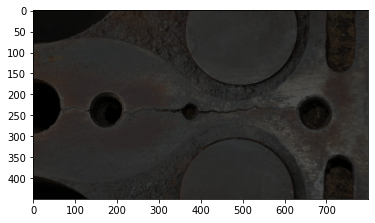

In [ ]:
plt.imshow(cv2.imread('/content/drive/MyDrive/output1.jpg'))

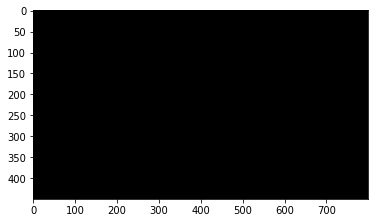

In [ ]:
import cv2
import matplotlib.pyplot as plt
im = cv2.imread('/content/drive/MyDrive/output.jpg')
plt.imshow(im)

In [ ]:
pip install segmentation-models

     |████████████████████████████████| 50 kB 6.6 MB/s 


In [ ]:
pip install -U segmentation-models==0.2.1

     |████████████████████████████████| 44 kB 2.2 MB/s 
     |████████████████████████████████| 76 kB 4.5 MB/s 
  Attempting uninstall: image-classifiers
    Found existing installation: image-classifiers 1.0.0
    Uninstalling image-classifiers-1.0.0:
      Successfully uninstalled image-classifiers-1.0.0
  Attempting uninstall: segmentation-models
    Found existing installation: segmentation-models 1.0.1
    Uninstalling segmentation-models-1.0.1:
      Successfully uninstalled segmentation-models-1.0.1


In [ ]:
import segmentation_models
segmentation_models.set_framework('tf.keras')

segmentation_models.framework()

'tf.keras'